<IPython.core.display.Javascript object>


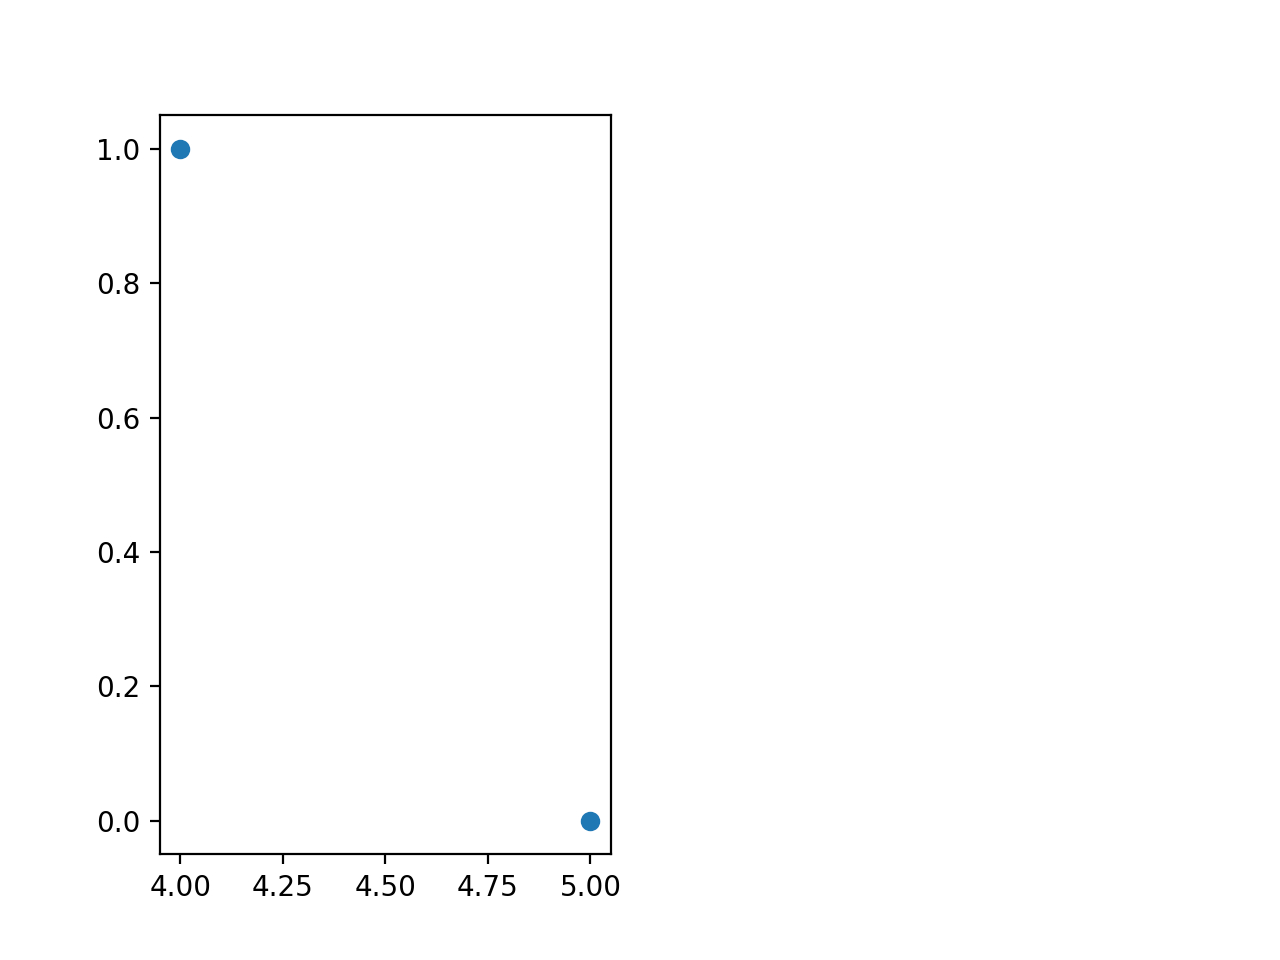

In [97]:
%matplotlib notebook

import itertools
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


cells = {(3,1): True, (4,1): True, (3,2): True, 
         (4,3): True, (5,2): True, (1,1): True}

fig = plt.figure()
ax1 = fig.add_subplot(121)


ax1.scatter(*zip(*cells.keys()))
plt.ion()

fig.show()
fig.canvas.draw()



def get_neighbors(coord, cells):
    x, y = coord
    xs = (x-1, x, x+1)
    ys = (y-1, y, y+1)
    neighbors = ([],[])

    for xi in xs:
        for yi in ys:
            if cells.get((xi,yi)):
                neighbors[0].append((xi, yi))
            else:
                neighbors[1].append((xi, yi))

    return neighbors
        
    
for _ in itertools.repeat(None, 100):
  
    new_cells = {}

    for cell, is_alive in cells.items():
        alive, dead = get_neighbors(cell, cells)
        new_cells[cell] = is_alive
    
        if is_alive and new_cells.get(cell) and 
            (len(alive) > 3 or len(alive) < 2):
            # All live cells with less than 2 or more than 3 live neighbors
            # die in the next generation.
            new_cells.pop(cell)
        elif not is_alive and len(dead) == 3:
            # Any dead cell with three live neighbours becomes a live cell.
            new_cells[cell] = True
        
        # Any live cell with two or three live neighbours survives.
        # Similarly, all other dead cells stay dead.
        
        for dead_cell in dead:
            alive, dead = get_neighbors(dead_cell, cells)
            if len(alive) == 3:
                new_cells[dead_cell] = True
    
    cells = new_cells
    
    ax1.clear()
    ax1.scatter(*zip(*cells.keys()))
    fig.canvas.draw()
    time.sleep(0.01)
